<a href="https://colab.research.google.com/github/Selengeenee/CHL8010HF2/blob/main/Lab_ImageVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Loading and Display using OpenCV and Matplotlib

In this section:

Load an image from disk using OpenCV  
Understand the difference between BGR and RGB color formats
Display the image using Matplotlib  

---

### Required Libraries

We will use two important libraries:

- **OpenCV (cv2)**: A powerful computer vision library used for image processing, object detection, and more. It reads images in **BGR (Blue, Green, Red)** format by default.
- **Matplotlib**: A plotting library for Python. We'll use its `pyplot` module to display images. Matplotlib expects images in **RGB (Red, Green, Blue)** format.


---

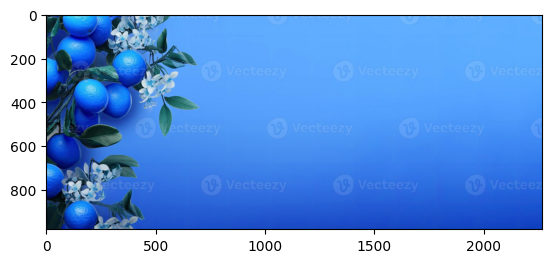

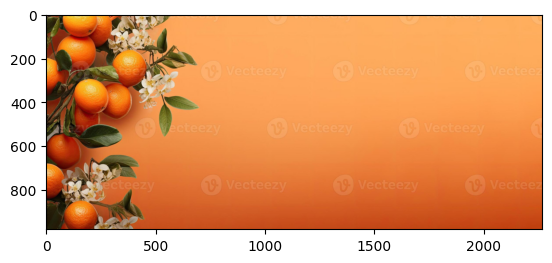

In [3]:
import cv2
from matplotlib import pyplot as plt

img_bgr = cv2.imread("/content/orangeBackground.jpeg")       # step 1 – read (BGR!)
assert img_bgr is not None, "Check the image path."

plt.imshow(img_bgr)
plt.axis("on")
plt.show()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)     # step 3 – render
plt.show()

## Exercise – Draw Shapes and Text on an Image

In this task, we will practice using OpenCV's drawing functions to add shapes and text to an image.


---

### Starter Code

The following code creates a copy of the image to draw on and displays the result at the end. You need to complete the missing parts to:

- Draw a green rectangle  
- Draw a blue diagonal line  
- Add a text label

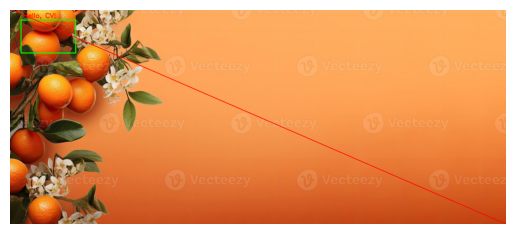

In [13]:
# Copy the image so we don't overwrite the original
canvas = img_rgb.copy()

# Drawing code goes here
# 1. Draw a rectangle
cv2.rectangle(canvas,(50,50),(300,200),(0,255,0),3)

# 2. Draw a diagonal line
cv2.line(canvas, (0,0), (canvas.shape[1], canvas.shape[0]), (255, 0, 0), 2)

# 3. Add a text label
cv2.putText(canvas, "Hello, CV!", (60,40), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)

# Display the final image
plt.imshow(canvas)
plt.axis("off")
plt.show()

## Exercise – Edge Detection and Contour Detection

In this task, we will perform a simple image processing pipeline to detect and outline objects (coins) in an image using OpenCV.

The steps include:

1. Load the image and convert it to grayscale  
2. Apply Gaussian blur to reduce noise  
3. Detect edges using the Canny edge detector  
4. Find contours based on detected edges  
5. Filter out small unwanted contours  
6. Draw the final contours on the original image  




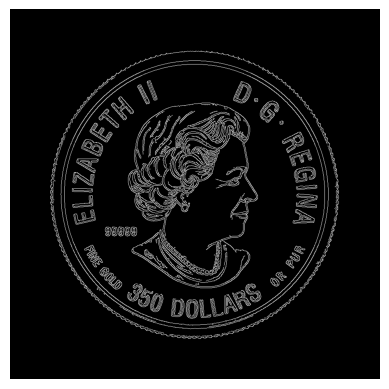

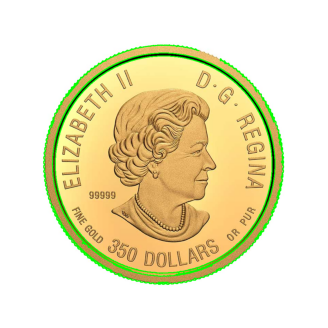

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img  = cv2.imread("/content/coin1.jpg")   # Loaded in BGR format
assert img is not None, "Check the image path."
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2) Apply Gaussian Blur
blur = cv2. GaussianBlur(gray, (5,5), 1)

# 3) Detect edges using Canny edge detector
edges = cv2.Canny(blur, 50, 150)

# Display the edges
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

# 4) Find contours (external contours only)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5) Filter small contours by area
min_area = 10
coin_contours = [c for c in contours if cv2.contourArea(c) > min_area]

# 6) Draw contours on a copy of the original image
output = img.copy()
cv2.drawContours(output, coin_contours, -1, (0, 255, 0), 2)

# Display the final result
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,4))
plt.imshow(output_rgb)
plt.axis('off')
plt.show()


## Extra Example – Detecting Multiple Circular Objects (Advanced)

The following code demonstrates a **more advanced** image processing technique for detecting multiple circular objects (coins) in an image.

This example is **not part of the core tasks**, but it is provided to give you an idea of how computer vision techniques can be extended to handle multiple object detection scenarios.

---

### What is a Transformation in Image Processing?

A **transformation** is a mathematical technique applied to an image to highlight certain features, patterns, or shapes. It can help detect edges, lines, circles, and other specific structures within an image.

One commonly used transformation is the **Hough Transform**, which is designed to detect simple geometric shapes like lines or circles in images.

---

### What is the Hough Transform?

The **Hough Transform** is a feature extraction technique used in computer vision to detect geometric shapes (lines, circles, etc.) in images, even if the shapes are partially hidden or distorted.

In this example, we use the `cv2.HoughCircles()` function, which applies the Hough Circle Transform to detect circular objects.


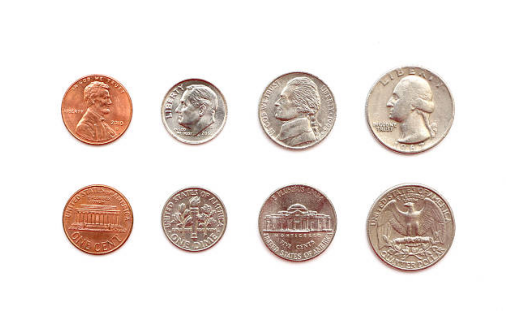

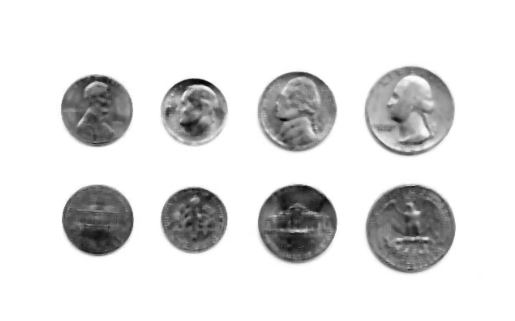

Found 8 circle(s)


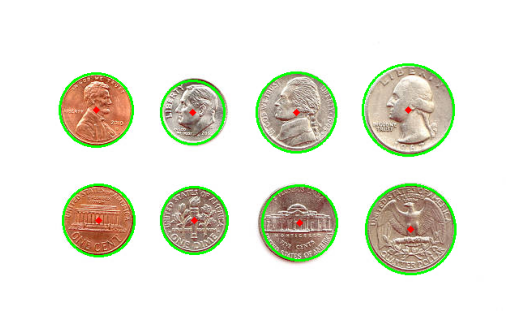

In [21]:
import cv2, numpy as np, matplotlib.pyplot as plt

# Step 1 – Read and pre-process the image
img  = cv2.imread("/content/coin2.jpg")      # Image with multiple coins

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)              # Apply median blur to reduce noise
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

# Step 2 – Detect circles using Hough Transform
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT,
    dp=1.2,                 # Accumulator resolution relative to image size
    minDist=50,             # Minimum distance between detected circle centers
    param1=100,             # Higher threshold for Canny edge detection
    param2=40,              # Accumulator threshold for circle detection
    minRadius=30,           # Minimum circle radius
    maxRadius=80            # Maximum circle radius
)

# Step 3 – Draw detected circles
out = img.copy()
if circles is not None:
    for x, y, r in np.uint16(np.around(circles[0])):
        cv2.circle(out, (x, y), r, (0, 255, 0), 2)   # Draw circle border
        cv2.circle(out, (x, y), 2, (0, 0, 255), 3)   # Draw center point

print(f"Found {0 if circles is None else len(circles[0])} circle(s)")

# Display the result
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [24]:
# install dependencies
!pip install ultralytics

## Object Detection with YOLO (You Only Look Once)

In this section, we demonstrate how to load a pretrained **YOLOv8** model for object detection tasks using the **Ultralytics** library.

This is a modern, advanced deep learning model capable of detecting multiple objects in images or videos in real-time.


### What is CUDA and Why Use a GPU?

**CUDA** (Compute Unified Device Architecture) is a parallel computing platform developed by **NVIDIA**. It allows programs to use the powerful processing capabilities of an NVIDIA **GPU** (Graphics Processing Unit) for general-purpose tasks, including deep learning and image processing.

---

#### Why Prefer a GPU Over a CPU?

- **Parallel Processing:** A GPU has thousands of smaller cores designed for handling many operations at once, making it ideal for tasks like image processing and deep learning.
- **Significant Speed Boost:** Complex models like YOLO run much faster on a GPU compared to a CPU, especially for large images or real-time detection.
- **Better Efficiency:** Offloading computations to the GPU frees up the CPU for other tasks, improving overall system performance.

In short, if a compatible GPU is available, it is always recommended to use it for heavy tasks like training or running deep learning models.



In [25]:
from ultralytics import YOLO
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on ➜  {device.upper()}")
if device == "cuda":
    print("CUDA device:", torch.cuda.get_device_name(0))
model = YOLO("yolov8x.pt").to(device)   # heavyweight, accurate
print(model.info())
model.fuse()                            # merges conv+BN for a small speed boost
model.info()                            # show layer/param counts



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Running on ➜  CUDA
CUDA device: Tesla T4


100%|██████████| 131M/131M [00:00<00:00, 308MB/s]


YOLOv8x summary: 209 layers, 68,229,648 parameters, 0 gradients, 258.5 GFLOPs
(209, 68229648, 0, 258.5472512)
YOLOv8x summary (fused): 112 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs
YOLOv8x summary (fused): 112 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs


(112, 68200608, 0, 257.8145792)

## Running Object Detection with YOLO

In this section, we apply the YOLOv8 model to detect objects in an image.

The `model()` function applies the YOLO model to the image file

The output results is a list of detection results

Each item in the list corresponds to one image (in this case, only one image was processed)

Therefore, we use results[0] to access the detection output for that specific image.


## What is Inside `results[0]`

The object `results[0]` is an instance of the `ultralytics.engine.results.Results` class.

This object contains all the information related to detections for the processed image.

You can find the full details in the [Ultralytics Results Documentation](https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.Results).


In [27]:
results = model("/content/car.jpg")
print(results[0])


image 1/1 /content/car.jpg: 384x640 1 person, 1 car, 62.7ms
Speed: 10.9ms preprocess, 62.7ms inference, 404.4ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple

(np.float64(-0.5), np.float64(1599.5), np.float64(960.5), np.float64(-0.5))

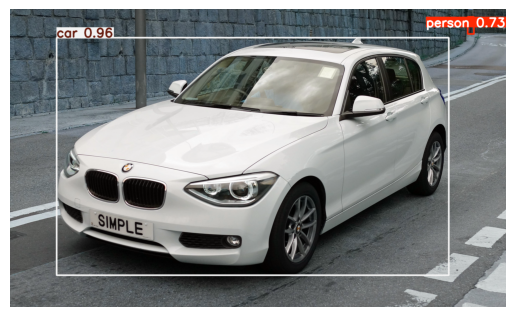

In [28]:
# single‑image inference
# inline plot:
import matplotlib.pyplot as plt, numpy as np
plt.imshow(results[0].plot()) ; plt.axis("off")

## Exercise – Reading Video Properties with OpenCV

In this task, we will:

- Load a video file using OpenCV  
- Check that the video is opened correctly  
- Extract important video properties such as:  
  - Frames per second (fps)  
  - Frame width and height  
  - Total number of frames  


In [43]:
import cv2, pathlib, os

# Specify the path to your video file
video_path = "/content/traffic_sample.MOV"  # ← replace with your own video path
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
assert cap.isOpened(), "Cannot open video – check path or codec."

# 2) Get video properties

fps = cap.get(cv2.CAP_PROP_FPS)
W   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H   = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
N   = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


# 3) Show results
print(f"{fps=:.2f}  {W=}×{H=}  total frames={N}")

fps=29.64  W=1280×H=720  total frames=304


## Previewing the First Frame of the Video with a Guide Line

Before processing a video, it's useful to preview the first frame to verify:

- The video loads correctly  
- The resolution is as expected  
- Any reference lines or regions of interest (ROI) are placed properly  

---

In [42]:
# preview 1st frame with a blue guide line
is_exist, preview = cap.read()
assert is_exist, "Video empty?"

y_line = 300
preview_line = preview.copy()
cv2.line(preview_line, (0, y_line), (W, y_line), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(preview_line, cv2.COLOR_BGR2RGB));
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

AssertionError: Video empty?

# Video Object Detection, Tracking, and Annotation Pipeline

This section demonstrates how to process a video frame by frame, applying object detection and tracking, while:

- Drawing annotated bounding boxes and labels on each frame  
- Tracking object IDs using YOLO with the built-in tracker (BYTETracker)  
- Recording detection details for later analysis  
- Saving the final annotated video  

---

In [44]:
rows = []  # will turn into a DataFrame
logged_ids = set()  # track IDs already logged

writer = cv2.VideoWriter(
    "street_annotated.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"), fps, (W, H))


frame_idx = 0

while True:
    ok, frame = cap.read()
    if not ok:
        break

    seconds=frame_idx / fps

    # 2️YOLO detection + tracking (BYTETracker)
    # with student
    results = model.track(frame, persist=True, conf=0.75, verbose=True)

    # 3️⃣ iterate detections
    for box in results[0].boxes:
        if box.id is None:
            continue

        tid = int(box.id.item())
        cls = model.names[int(box.cls.item())]
        conf = float(box.conf.item())
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # draw box & label
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"{cls}:{tid}", (x1, y1 - 8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        cv2.putText(frame,f"Timer: {seconds}",(50,50),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        # log one row
        if tid not in logged_ids:
            rows.append({
                "timestamp": seconds,
                "frame": frame_idx,
                "track_id": tid,
                "class": cls,
                "confidence": conf,
                "x1": x1, "y1": y1, "x2": x2, "y2": y2
            })
            logged_ids.add(tid)


    writer.write(frame)
    frame_idx += 1

cap.release(); writer.release();
print("Finished — wrote street_annotated.mp4")


0: 384x640 1 person, 1 car, 63.3ms
Speed: 2.2ms preprocess, 63.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bicycle, 2 cars, 63.1ms
Speed: 2.8ms preprocess, 63.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bicycle, 2 cars, 61.1ms
Speed: 2.6ms preprocess, 61.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bicycle, 2 cars, 47.0ms
Speed: 2.4ms preprocess, 47.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 bicycle, 2 cars, 46.4ms
Speed: 2.4ms preprocess, 46.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 bicycle, 2 cars, 39.9ms
Speed: 2.1ms preprocess, 39.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 bicycle, 1 car, 40.0ms
Speed: 2.2ms preprocess, 40.0ms inference, 1.5ms postprocess per image at shape (1, 3, 38

## Exporting Detection Data to CSV

After processing the video and collecting detection information into the `rows` list, we can convert this data into a structured table using **pandas**, and save it as a `.csv` file for further analysis.

---

In [45]:
import pandas as pd

# Convert detection results to a DataFrame
df = pd.DataFrame(rows)

# Save to a CSV file (no row indices included)
df.to_csv("detection_log.csv", index=False)

print("Detection results saved to detection_log.csv")

Detection results saved to detection_log.csv
